In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
""" Your code hear: """
train = pd.read_csv('./train.csv')

## 取出連續型特徵 (方便降維)

In [3]:
""" Your code hear: """
cont_col = train.columns[train.dtypes !='object']
train_cont = train[cont_col]
train_cont.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1431,60,60.0,21930,5,5,2005,2005,0.0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,757,60,68.0,10769,8,5,2007,2007,0.0,20,...,144,105,0,0,0,0,0,4,2009,212000
2,632,120,34.0,4590,8,5,2006,2006,108.0,24,...,156,73,0,0,0,0,0,8,2007,209500
3,1193,50,60.0,9600,5,8,1925,1994,0.0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,773,80,94.0,7819,6,5,1976,1976,0.0,422,...,144,0,0,0,0,0,0,3,2010,107000


## 分析缺失值

<BarContainer object of 3 artists>

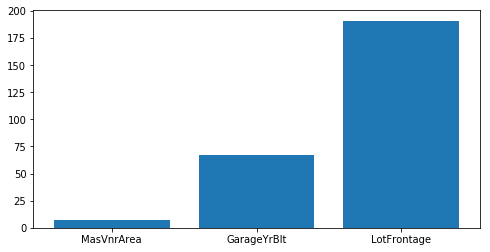

In [4]:
""" Your code hear: 練習印出缺失值圖表 """
missing = train_cont.isnull().sum(axis=0)
missing = missing[missing>0]
missing.sort_values(inplace=True)

plt.figure(figsize=(8,4))
plt.bar(missing.index, missing)

## 去除缺失值

In [5]:
""" Your code hear: 去除缺失值 """
train_cont= train_cont.dropna(axis=0)
train_cont.isnull().sum(axis=0)

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [6]:
train_cont.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1431,60,60.0,21930,5,5,2005,2005,0.0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,757,60,68.0,10769,8,5,2007,2007,0.0,20,...,144,105,0,0,0,0,0,4,2009,212000
2,632,120,34.0,4590,8,5,2006,2006,108.0,24,...,156,73,0,0,0,0,0,8,2007,209500
3,1193,50,60.0,9600,5,8,1925,1994,0.0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,773,80,94.0,7819,6,5,1976,1976,0.0,422,...,144,0,0,0,0,0,0,3,2010,107000


In [7]:
ID = train_cont['Id']
SalePrice = train_cont['SalePrice']
train_cont.drop(columns=['Id', 'SalePrice'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,60.0,21930,5,5,2005,2005,0.0,0,0,...,372,100,40,0,0,0,0,0,7,2006
1,60,68.0,10769,8,5,2007,2007,0.0,20,0,...,578,144,105,0,0,0,0,0,4,2009
2,120,34.0,4590,8,5,2006,2006,108.0,24,0,...,627,156,73,0,0,0,0,0,8,2007
3,50,60.0,9600,5,8,1925,1994,0.0,0,0,...,250,0,0,84,0,0,0,0,7,2007
4,80,94.0,7819,6,5,1976,1976,0.0,422,127,...,672,144,0,0,0,0,0,0,3,2010
5,20,100.0,12000,5,7,1948,2005,0.0,144,608,...,528,0,36,0,0,0,0,0,5,2008
6,60,313.0,63887,10,5,2008,2008,796.0,5644,0,...,1418,214,292,0,0,0,480,0,1,2008
7,20,88.0,11443,8,5,2005,2006,208.0,1460,0,...,880,326,66,0,0,0,0,0,3,2006
8,60,65.0,12257,8,5,1995,1995,513.0,56,64,...,752,222,98,0,0,0,0,0,11,2007
9,20,73.0,9300,5,5,1960,1960,324.0,697,0,...,461,0,0,0,0,143,0,0,4,2010


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [8]:
""" Your code hear: """
y = train_cont['SalePrice']
train_np = (train_cont - np.mean(train_cont, axis=0))/ np.std(train_cont, axis=0)
label=[0,1,2,3]
Y_label = pd.qcut(y,4, labels=label)
Y_label = Y_label.reset_index(drop=True)

## 利用 TSNE 降維

In [9]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(train_np)

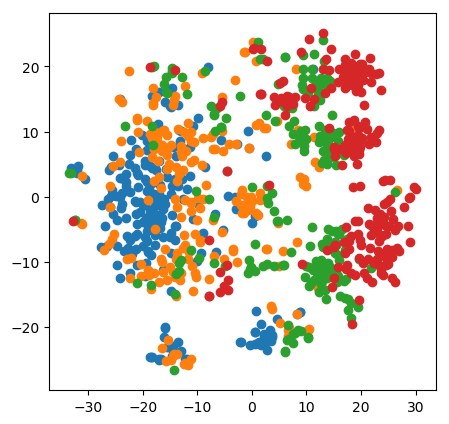

In [10]:
""" Your code hear: """
plt.figure(figsize = (5, 5), dpi = 100)
for index in range(len(label)):
    xslice = Y_label[Y_label==index].index
    plt.scatter(X_tsne[xslice,0], X_tsne[xslice,1], label=index)

## 做圖

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

In [ ]:
壓縮成2維，可能造成點重合性高